In [39]:
#installing pyspark

!pip install pyspark
!pip install nltk
!pip install pandas
!pip install matplotlib


In [40]:
#import SparkSession

from pyspark.sql import SparkSession, udf
from pyspark.sql.types import ArrayType, StringType
from pyspark import SparkContext

In [41]:
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt


In [42]:
#create spark session object
ss = SparkSession.builder.appName('Taller2').getOrCreate()
sc = ss.sparkContext.getOrCreate()

In [52]:
# read the data from text file
rdd = sc.textFile('sources/0704.3504.pdf.txt')

#organize the words and count them
words = rdd.flatMap(lambda line: line.split(" ")).map(lambda word: (word, 1))

#get the tokens
all_tokens = []
for tupla in words.collect() :
   all_tokens.append(str(tupla[0]).lower()) 

print(all_tokens)
print('Initial Size of new BoW title = ', len(all_tokens))

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'ar', 'x', '', 'iv', ':0', '', '70', '4.', '', '35', '04', '', 'v1', '', '', '[', '', 'qu', 'an', '', 't-', 'ph', '', ']', '', '', '2', '', '6', '', 'a', '', 'pr', '', '2', '', '00', '7', '', 'smooth', 'reì\x81nyi', 'entropy', 'of', 'ergodic', 'quantum', 'information', 'sources', '', 'berry', 'schoenmakers', 'jilles', 'tjoelker', 'dept.', 'of', 'mathematics', 'and', 'computer', 'science', '', 'technical', 'university', 'eindhoven', 'the', 'netherlands', '', 'berry@win.tue.nl', 'j.tjoelker@student.tue.nl', '', 'pim', 'tuyls', 'information', 'security', 'systems', 'philips', 'research', 'eindhoven', '', 'the', 'netherlands', 'pim.tuyls@philips.com', '', 'evgeny', 'verbitskiy', 'digital', 'signal', 'processing', '', 'philips', 'research', 'eindhoven', 'the

In [53]:
#removing special characteres
tokens = [w for w in all_tokens if w.isalpha()]
print('Size of new BoW title = ', len(tokens))

#removing tokens that contains non ascii characters
tokens = [w.encode('ascii', 'ignore').decode('ascii') for w in tokens]
print('Size of new BoW title = ', len(tokens))
#print(tokens)
#removing tokens that have one or less characteres
tokens = [w for w in tokens if len(w)>1]
print('Size of new BoW title = ', len(tokens))
print(tokens)

Size of new BoW title =  2387
Size of new BoW title =  2387
Size of new BoW title =  2188
['ar', 'iv', 'qu', 'an', 'ph', 'pr', 'smooth', 'entropy', 'of', 'ergodic', 'quantum', 'information', 'sources', 'berry', 'schoenmakers', 'jilles', 'tjoelker', 'of', 'mathematics', 'and', 'computer', 'science', 'technical', 'university', 'eindhoven', 'the', 'netherlands', 'pim', 'tuyls', 'information', 'security', 'systems', 'philips', 'research', 'eindhoven', 'the', 'netherlands', 'evgeny', 'verbitskiy', 'digital', 'signal', 'processing', 'philips', 'research', 'eindhoven', 'the', 'netherlands', 'we', 'investigate', 'the', 'recently', 'introduced', 'notion', 'of', 'smooth', 'entropy', 'for', 'the', 'case', 'of', 'ergodic', 'information', 'thereby', 'generalizing', 'previous', 'work', 'which', 'concentrated', 'mainly', 'on', 'information', 'we', 'will', 'actually', 'consider', 'ergodic', 'quantum', 'information', 'of', 'which', 'ergodic', 'classical', 'mation', 'sources', 'are', 'special', 'we', 'p

In [54]:
#Removing stopwords
from nltk.corpus import stopwords 
stop_words_nltk = set(stopwords.words('english'))

tokens = [w for w in tokens if w not in stop_words_nltk]
print('Size of new BoW title = ', len(tokens))
print(tokens)


Size of new BoW title =  1122
['ar', 'iv', 'qu', 'ph', 'pr', 'smooth', 'entropy', 'ergodic', 'quantum', 'information', 'sources', 'berry', 'schoenmakers', 'jilles', 'tjoelker', 'mathematics', 'computer', 'science', 'technical', 'university', 'eindhoven', 'netherlands', 'pim', 'tuyls', 'information', 'security', 'systems', 'philips', 'research', 'eindhoven', 'netherlands', 'evgeny', 'verbitskiy', 'digital', 'signal', 'processing', 'philips', 'research', 'eindhoven', 'netherlands', 'investigate', 'recently', 'introduced', 'notion', 'smooth', 'entropy', 'case', 'ergodic', 'information', 'thereby', 'generalizing', 'previous', 'work', 'concentrated', 'mainly', 'information', 'actually', 'consider', 'ergodic', 'quantum', 'information', 'ergodic', 'classical', 'mation', 'sources', 'special', 'prove', 'average', 'smooth', 'entropy', 'rate', 'approach', 'entropy', 'rate', 'ergodic', 'equal', 'shannon', 'entropy', 'rate', 'classical', 'source', 'von', 'neumann', 'entropy', 'rate', 'quantum', 'in

['ar', 'iv', 'qu', 'ph', 'pr', 'smoo', 'entrop', 'ergod', 'quant', 'inform', 'sourc', 'berry', 'schoenmakers', 'jil', 'tjoelk', 'mathem', 'comput', 'sci', 'techn', 'univers', 'eindhov', 'netherland', 'pim', 'tuyl', 'inform', 'sec', 'system', 'philip', 'research', 'eindhov', 'netherland', 'evgeny', 'verbitskiy', 'digit', 'sign', 'process', 'philip', 'research', 'eindhov', 'netherland', 'investig', 'rec', 'introduc', 'not', 'smoo', 'entrop', 'cas', 'ergod', 'inform', 'thereby', 'gen', 'prevy', 'work', 'cont', 'main', 'inform', 'act', 'consid', 'ergod', 'quant', 'inform', 'ergod', 'class', 'mat', 'sourc', 'spec', 'prov', 'av', 'smoo', 'entrop', 'rat', 'approach', 'entrop', 'rat', 'ergod', 'eq', 'shannon', 'entrop', 'rat', 'class', 'sourc', 'von', 'neuman', 'entrop', 'rat', 'quant', 'introduc', 'eleg', 'not', 'smoo', 'entrop', 'introduc', 'rec', 'ren', 'wolf', 'class', 'inform', 'nat', 'extend', 'quant', 'inform', 'sourc', 'defin', 'ren', 'konig', 'two', 'pap', 'work', 'ren', 'wolf', 'many

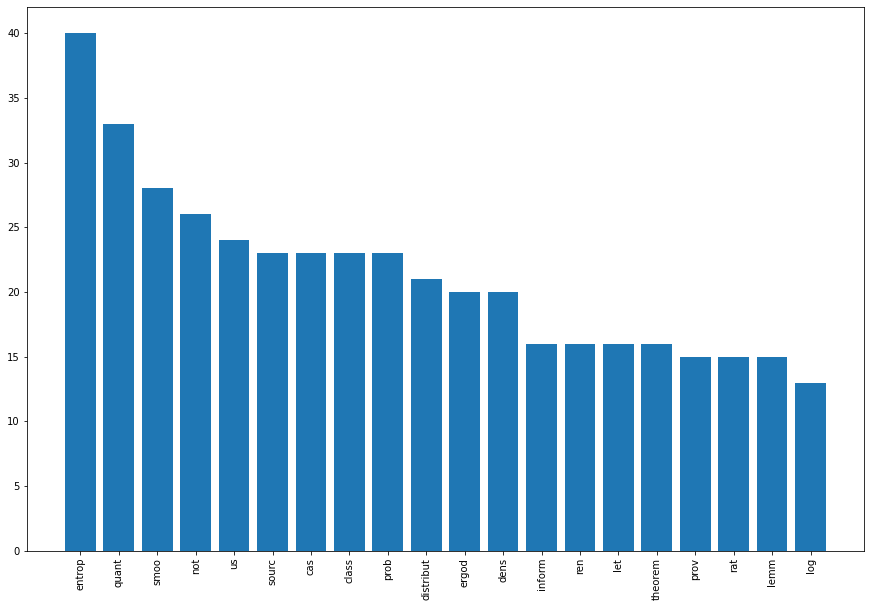

In [55]:
#steamming
from nltk.stem import LancasterStemmer

lancaster = LancasterStemmer()
tokens = [lancaster.stem(w) for w in tokens]
print(tokens)

fdist_steamming = nltk.FreqDist(tokens)
topwords_steamming = fdist_steamming.most_common(20)
print('Size of new BoW title =',len(fdist_steamming))
x,y = zip(*topwords_steamming)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

['ar', 'iv', 'qu', 'ph', 'pr', 'smoo', 'entrop', 'ergod', 'quant', 'inform', 'sourc', 'berry', 'schoenmakers', 'jil', 'tjoelk', 'mathem', 'comput', 'sci', 'techn', 'univers', 'eindhov', 'netherland', 'pim', 'tuyl', 'inform', 'sec', 'system', 'philip', 'research', 'eindhov', 'netherland', 'evgeny', 'verbitskiy', 'digit', 'sign', 'process', 'philip', 'research', 'eindhov', 'netherland', 'investig', 'rec', 'introduc', 'not', 'smoo', 'entrop', 'ca', 'ergod', 'inform', 'thereby', 'gen', 'prevy', 'work', 'cont', 'main', 'inform', 'act', 'consid', 'ergod', 'quant', 'inform', 'ergod', 'class', 'mat', 'sourc', 'spec', 'prov', 'av', 'smoo', 'entrop', 'rat', 'approach', 'entrop', 'rat', 'ergod', 'eq', 'shannon', 'entrop', 'rat', 'class', 'sourc', 'von', 'neuman', 'entrop', 'rat', 'quant', 'introduc', 'eleg', 'not', 'smoo', 'entrop', 'introduc', 'rec', 'ren', 'wolf', 'class', 'inform', 'nat', 'extend', 'quant', 'inform', 'sourc', 'defin', 'ren', 'konig', 'two', 'pap', 'work', 'ren', 'wolf', 'many'

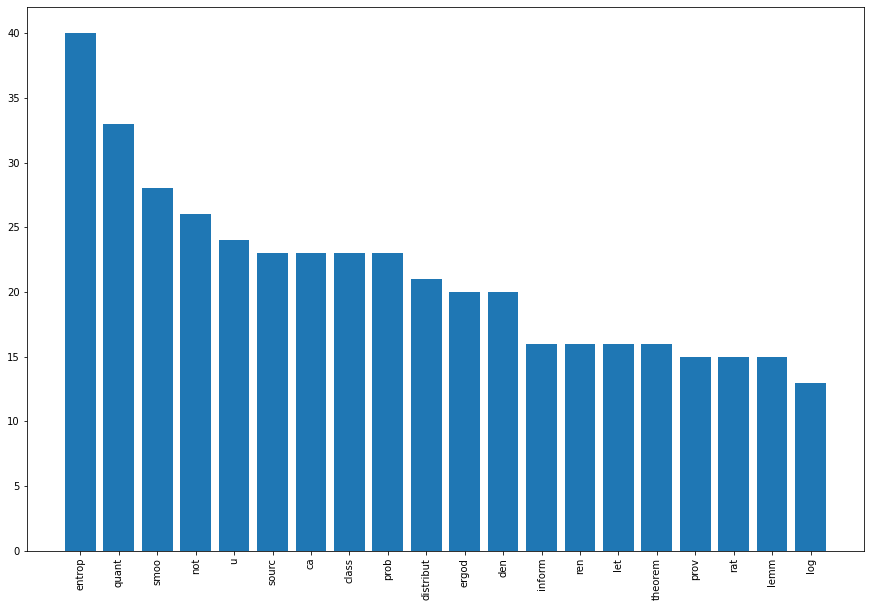

In [56]:
# Lemmatization con NLTK

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]
print(tokens)

fdist_lemmatizer = nltk.FreqDist(tokens)
topwords_lemmatizer = fdist_lemmatizer.most_common(20)
print('Size of new BoW title =',len(fdist_lemmatizer))
x,y = zip(*topwords_lemmatizer)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()